#**Task 1: Prediction using Supervised ML (Author: BHOOMIKA B)**

# Problem statement:  

#**Predict the percentage score of an student based on the number of study hours per day**

#Importing all libraries required

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Importing Data set

In [ ]:
file_=pd.read_csv('http://bit.ly/w-data')
print('Data imported sucessfully')
file_

Data imported sucessfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Plot the 2-D graph to identify the relationship between Hours studied and percentage scored by the student

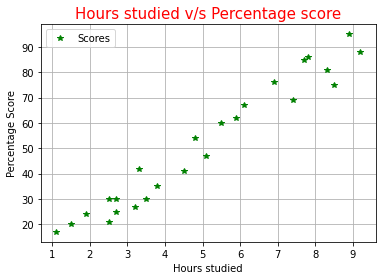

In [ ]:
file_.plot(x='Hours',y='Scores',style='*',color='g')
plt.xlabel('Hours studied',size=10)
plt.ylabel('Percentage Score',size=10)
plt.title('Hours studied v/s Percentage score',color='r',size=15)
plt.grid()
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

#Preparing the data

Next step is to divide the given data into attributes (input) and labels (outputs)

In [ ]:
X=file_.iloc[:,:-1].values
print(X)
Y=file_.iloc[:,1].values
print(Y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


Next stept is to spit the inputs and outputs into Train and Test data.

80% of data is splited as Train data and remaining 20% of data is spilted as Test data 

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=5,random_state=0)
print('Input train data:\n',x_train)
print('Input Test data:\n',x_test)
print('Output train data:',y_train)
print('Output test data:',y_test) 

Input train data:
 [[3.8]
 [1.9]
 [7.8]
 [6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]]
Input Test data:
 [[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
Output train data: [35 24 86 76 17 47 85 42 81 88 67 30 25 60 30 75 21 54 95 41]
Output test data: [20 27 69 30 62]


#Training the Algorithm

After spliting the data into train and test data, next step is train the data

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train, y_train)
score=model.score(x_train,y_train)
print('Value of R^2 is :',score)
print('Training of Data is completed')


Value of R^2 is : 0.9515510725211553
Training of Data is completed


**As the Co-efficient of determination (R^2) value is near to 1, then the train data is fits better to the model and training of data is completed.**

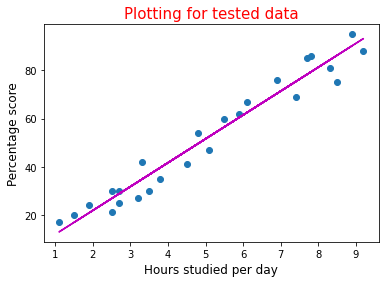

In [ ]:
# Plotting the regression line
line=(model.coef_*X)+model.intercept_

# Plotting for the test data
plt.scatter(X,Y)
plt.plot(X,line,color='m')
plt.title('Plotting for tested data',size=15,color='r')
plt.xlabel('Hours studied per day',size=12)
plt.ylabel('Percentage score',size=12)
plt.show()

#Making predictions

In [ ]:
pred=model.predict(x_test)
x_test_hours=np.array(x_test).reshape(1,5)  #converting 2-D into 1-D array

#Comparing Actual score and predicted score for the Hours studied
data_tabel=pd.DataFrame({'Hours studied':x_test_hours[0],'Actual score':y_test,'Predicted score':pred})
data_tabel

,Hours studied,Actual score,Predicted score
0,1.5,20,16.884145
1,3.2,27,33.732261
2,7.4,69,75.357018
3,2.5,30,26.794801
4,5.9,62,60.491033


#Solution for the given problem

**Now the solution is ready for the problem and can predict percentage score for any given input as Hours studied**

In [59]:
a=float(input('Hours studied per day: '))
new_hour=np.array([[a]])
new_pred=model.predict(new_hour)
print('Predicted precentage score:',new_pred[0])

Hours studied per day: 9.25
Predicted precentage score: 93.69173248737539


#Evaluating the Model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset.

In [ ]:
from sklearn.metrics import mean_absolute_error
print('Mean absolute error is',mean_absolute_error(y_test,pred))

Mean absolute error is 4.183859899002982


The mean absolute error is low, means most of the time model predicts correct answer. 

**Hence we can use this model to predict the percentage scored by student for the given Hours studied per day.**